5.Work with the diabetes dataset to perform multiple logistic regression.

6.What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

7.Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

8.Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

In [62]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [63]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The objective is to predict the number of patients who has diabetes based on diagnostic measurements

In [64]:
# lets check the dimensions of the DataFrame.
diabetes_df.shape

(768, 9)

In [65]:
# we can extract the features and label arrays rom the dataframe using iloc[]

X = diabetes_df.iloc[:,:-1].values
y = diabetes_df.iloc[:,-1].values

In [66]:
# we can calculate the proportion of observations that are actually diabetic in the dataframe
print(np.mean(y==1))

0.3489583333333333


we can infer that roughly 35% of the individuals represented in the dataset are in fact diabetic.

In [67]:
# split the data into train set and test set using sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [68]:
# Now we can create our logistic regression classifier using sklearn

lrm = LogisticRegression(solver='lbfgs', penalty='none', max_iter=2000)
lrm.fit(X_train, y_train)

np.set_printoptions(suppress=True)
print("Intercept:     ", lrm.intercept_)
print("Coefficients:  ", lrm.coef_)

Intercept:      [-8.46745846]
Coefficients:   [[ 0.15019089  0.03328279 -0.01633804 -0.0013968   0.00010002  0.09492983
   1.06170184  0.01660607]]


In [69]:
# We use the model's score() method to calculate its accuracy on the training and test sets.

train_acc = lrm.score(X_train, y_train)
test_acc = lrm.score(X_test, y_test)

print("Training Accuracy: ", round(train_acc,3))
print("Test Accuracy: ", round(test_acc,3))

Training Accuracy:  0.786
Test Accuracy:  0.771


In [70]:
# Now we use our model to generate predictions for each of the first three observations in our test set.
pd.DataFrame(X_test[:3], columns=diabetes_df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,131.0,66.0,40.0,0.0,34.3,0.196,22.0
1,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
2,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0


In [71]:
# we can predict the Outcome of each of these obsevations using predict() method.

print('Predicted Labels:', lrm.predict(X_test[:10]))
print('Observed Labels: ', y_test[:10])

Predicted Labels: [0 1 0 0 0 0 1 0 0 0]
Observed Labels:  [1 0 0 0 0 1 0 0 1 0]


In [72]:
print(lrm.predict_proba(X_test[:3,]))

[[0.80409304 0.19590696]
 [0.20168179 0.79831821]
 [0.6857689  0.3142311 ]]


In [73]:
# we can display the confusion matrix, calculated on the test set
pred_test = lrm.predict(X_test)
cm = confusion_matrix(y_test, pred_test)
cm

array([[133,  17],
       [ 36,  45]], dtype=int64)

In [82]:
# Finally we can check the classification report for our model based on the test set

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



From the above classification Report we can suggests the following:

The model classifies someone as non-diabetic, it will be correct roughly 79% of the time.

The model classifies someone as diabetic, it will be correct roughly 73% of the time.

The model classify 83% of the individuals as non-diabetic.

The model classify 56% of the individuals as diabetic.


From the classification report of our model, we can say that roughly 79% of the time the model classifies someone as non-diabetic and roughly 73% of the time, the model classifies someone as diabetic 

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 1 1 0]


In [75]:
print(knn.score(X_test,y_test))

0.7272727272727273


In [76]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[127,  23],
       [ 40,  41]], dtype=int64)

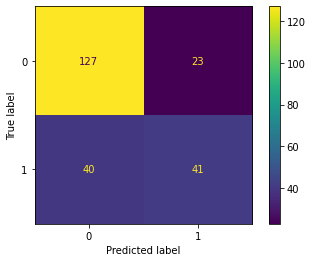

In [77]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_confusion_matrix(knn, X_test, y_test)